#Chustomer Churn Prediction

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import joblib

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

##Load Data

In [2]:
churn_df = pd.read_csv('/content/churn_data.csv')
churn_df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,NaN,Yes,42.39,No,Yes,Cable,16,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,Others,Others
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Others,Others
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


##Feature Engineering

The 'Customer ID', 'Churn Category', 'Churn Category', 'Churn Reason', and 'Customer Status' Columns unnecessary for this project, so we will remove these columns.

In [3]:
X = churn_df.drop(['Customer ID', 'Churn Category', 'Churn Reason', 'Customer Status'], axis=1)
y = churn_df['Customer Status']

In [4]:
numerical = X.select_dtypes(['int', 'float']).columns.tolist()
categorical = X.select_dtypes(exclude=['int', 'float']).columns.tolist()

In [5]:
display('Numerical Features:', numerical, 'Categoriical Features:', categorical)

'Numerical Features:'

['Age',
 'Number of Dependents',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue']

'Categoriical Features:'

['Gender',
 'Married',
 'City',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method']

##Encoding

We need to label the categorical columns so that it can be used for predict the target variable.

In [6]:
!mkdir /content/model

In [7]:
for feature in categorical:
    encoder = LabelEncoder()
    X[feature] = encoder.fit_transform(X[feature])
    joblib.dump(encoder, f'/content/model/{feature}_encoder.joblib')

y = y.map({'Stayed': 0, 'Churned': 1})

In [8]:
X.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,37,1,0,346,93225,34.827662,-118.999073,2,9,5,1,42.39,0,1,0,16,0,1,0,1,1,0,0,1,1,1,1,65.6,593.30,0.00,0,381.51,974.81
1,1,46,0,0,368,91206,34.162515,-118.203869,0,9,5,1,10.69,1,1,0,10,0,0,0,0,0,1,1,0,0,0,1,-4.0,542.40,38.33,10,96.21,610.28
2,1,50,0,0,222,92627,33.645672,-117.922613,0,4,4,1,33.65,0,1,2,30,0,0,1,0,0,0,0,1,0,1,0,73.9,280.85,0.00,0,134.60,415.45
3,1,78,1,0,587,94553,38.014457,-122.115432,1,13,3,1,27.82,0,1,2,4,0,1,1,0,1,1,0,1,0,1,0,98.0,1237.85,0.00,0,361.66,1599.51
4,0,75,1,0,139,93010,34.227846,-119.079903,3,3,5,1,7.38,0,1,2,11,0,0,0,1,1,0,0,1,0,1,1,83.9,267.40,0.00,0,22.14,289.54


In [72]:
y.head()

,Customer Status
0,0
1,0
2,1
3,1
4,1


##Split Data

The clean data is split int into train data and test data with the ratio of 80:20.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

In [10]:
def scaling(features, df, df_test):
    df = df.copy()
    df_test = df_test.copy()
    for feature in features:
        scaler = StandardScaler()
        X = np.array(df[feature]).reshape(-1, 1)
        df[feature] = scaler.fit_transform(X)
        joblib.dump(scaler, f'/content/model/{feature}_scaler.joblib')

        X_test = np.array(df_test[feature]).reshape(-1, 1)
        df_test[feature] = scaler.transform(X_test)
    return df, df_test

In [11]:
X_train_scaled, X_test_scaled = scaling(numerical, X_train, X_test)

##Modeling

Before train the model, we create the function to evaluate the model.

In [12]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

    sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
        xticklabels=['Churn', 'No Churn'],
        yticklabels=['Churn', 'No Churn'])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

We will compare various models with different algorithms and then choose the one with the best performance.

###Logistic Regression

In [38]:
lr_model = LogisticRegression(random_state=42)

param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr_cv = RandomizedSearchCV(estimator=lr_model, param_distributions=param_dist, cv=5, n_jobs=-1, verbose=2)
lr_cv.fit(X_train, y_train)
display(
    lr_cv.best_params_,
    lr_cv.best_score_
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'solver': 'liblinear', 'penalty': 'l1', 'C': 10}

0.8487961006142252

####Hyperparameter Tuning

In [39]:
lr_model = LogisticRegression(
    C=10,
    penalty='l1',
    solver='liblinear'
)
lr_model.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

##Random Forest

In [40]:
rf_model = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
    }

rf_cv = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, cv=5, n_jobs=-1, verbose=2)
rf_cv.fit(X_train, y_train)
display(
    rf_cv.best_params_,
    rf_cv.best_score_
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

0.8761160822684065

###Hyperparameter Tuning

In [41]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='sqrt'
  )
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10)

##SVM

In [17]:
svm_model = SVC(random_state=42)

param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_cv = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist, cv=5, n_jobs=-1, verbose=2)
svm_cv.fit(X_train, y_train)
display(
    svm_cv.best_params_,
    svm_cv.best_score_
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'kernel': 'linear', 'gamma': 'auto', 'C': 0.1}

0.8138883243252966

###Hyperparameter Tuning

In [18]:
svm_model = SVC(
    C=0.1,
    kernel='linear',
    gamma='auto'
)
svm_model.fit(X_train, y_train)

SVC(C=0.1, gamma='auto', kernel='linear')

##XGBoost

In [63]:
xgb_model = XGBClassifier(random_state=42)

param_dist = {
    'n_estimators': [10, 25, 50, 100, 150],
    'learning_rate': [0.001, 0.01, 0.1, 1, 10],
    'max_depth': [2, 3, 5, 7, 10]
}

xgb_model = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, cv=5, n_jobs=-1, verbose=2)
xgb_model.fit(X_train, y_train)
display(
    xgb_model.best_params_,
    xgb_model.best_score_
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}

0.8821872892254288

###Hyperparameter tuning

In [64]:
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Evaluation

### Model Comparison

In [65]:
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost']
models = [lr_model, rf_model, svm_model, xgb_model]

model_names_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

for name, model in zip(model_names, models):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_names_list.append(name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)

results_df = pd.DataFrame({
    'Model': model_names_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_score_list
})

results_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
3,XGBoost,0.889226,0.862385,0.736292,0.794366
1,Random Forest,0.874052,0.865320,0.671018,0.755882
0,Logistic Regression,0.845220,0.742547,0.715405,0.728723
2,SVM,0.815630,0.727273,0.584856,0.648336


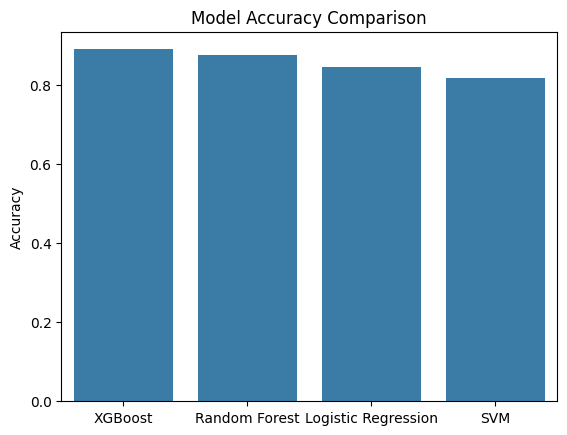

In [81]:
sns.barplot(x='Model', y='Accuracy', data=results_df.sort_values(by='Accuracy', ascending=False), color='#2980B9')
plt.title('Model Accuracy Comparison')
plt.xlabel(None)
plt.show()

### Confusion Matrix

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       935
           1       0.86      0.74      0.79       383

    accuracy                           0.89      1318
   macro avg       0.88      0.84      0.86      1318
weighted avg       0.89      0.89      0.89      1318



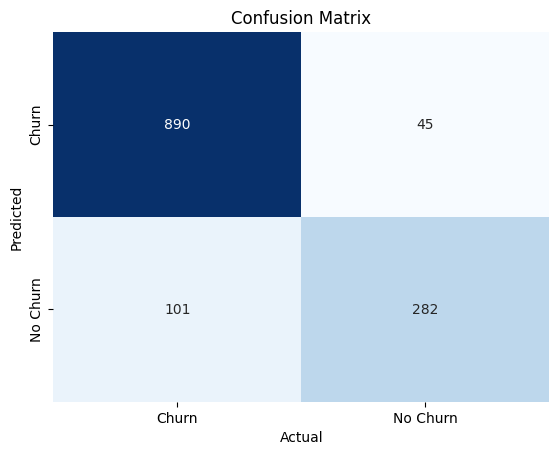

In [83]:
y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Churn', 'No Churn'],
            yticklabels=['Churn', 'No Churn']
            )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Save Model

In [68]:
joblib.dump(xgb_model, '/content/model/model.joblib')

['/content/model/model.joblib']

## Predict on New Data

In [69]:
new_df = pd.read_csv('/content/join_data.csv')
new_df = new_df.drop(['Customer ID', 'Churn Category', 'Churn Reason', 'Customer Status'], axis=1)

loaded_encoder = {}
for feature in categorical:
  loaded_encoder[f'{feature}_encoder'] = joblib.load(f'/content/model/{feature}_encoder.joblib')
  new_df[feature] = loaded_encoder[f'{feature}_encoder'].fit_transform(new_df[feature])

loaded_scaler = {}
for feature in numerical:
  loaded_scaler[f'{feature}_scaler'] = joblib.load(f'/content/model/{feature}_scaler.joblib')
  X_new = np.array(new_df[feature]).reshape(-1, 1)
  new_df[feature] = loaded_scaler[f'{feature}_scaler'].fit_transform(X_new)

new_df.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,1.954848,0,-0.41574,258,-0.721140,-1.259870,1.206240,-0.389585,-0.880966,0,1,-0.958617,1,1,2,0.338311,0,0,0,0,0,0,0,1,1,1,0,1.192750,-0.107016,-0.086904,-0.24665,-0.901548,-0.444107
1,0,-1.400544,0,-0.41574,153,0.066619,0.164062,0.833355,-0.389585,1.565265,1,1,-1.265376,0,0,3,-0.768485,0,0,0,0,0,0,0,0,0,0,1,-0.932512,-0.328702,-0.086904,-0.24665,-0.854327,-0.593042
2,1,0.746907,0,-0.41574,47,0.601016,1.020175,-1.334761,-0.389585,-0.880966,0,1,1.362198,0,1,1,-0.315705,0,0,0,0,0,0,0,1,0,1,1,0.061989,-0.520633,-0.086904,-0.24665,0.143269,-0.361527
3,0,-1.601867,1,-0.41574,291,-0.442278,-1.099238,1.270179,3.714168,0.342149,1,1,-1.164443,0,1,2,1.897888,1,1,0,0,1,0,0,1,0,0,0,1.935066,1.654576,-0.086904,-0.24665,-0.856109,0.897873
4,0,1.149554,0,-0.41574,80,1.033958,0.526168,-0.611787,-0.389585,1.565265,1,1,-1.293743,0,0,3,-0.768485,0,0,0,0,0,0,0,0,0,0,1,-0.928444,-0.316800,-0.086904,-0.24665,-0.892639,-0.598524


In [70]:
loaded_model = joblib.load('/content/model/model.joblib')
pred = loaded_model.predict(new_df)

new_df['customer_status_predicted'] = pred
new_df.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,customer_status_predicted
0,0,1.954848,0,-0.41574,258,-0.721140,-1.259870,1.206240,-0.389585,-0.880966,0,1,-0.958617,1,1,2,0.338311,0,0,0,0,0,0,0,1,1,1,0,1.192750,-0.107016,-0.086904,-0.24665,-0.901548,-0.444107,1
1,0,-1.400544,0,-0.41574,153,0.066619,0.164062,0.833355,-0.389585,1.565265,1,1,-1.265376,0,0,3,-0.768485,0,0,0,0,0,0,0,0,0,0,1,-0.932512,-0.328702,-0.086904,-0.24665,-0.854327,-0.593042,1
2,1,0.746907,0,-0.41574,47,0.601016,1.020175,-1.334761,-0.389585,-0.880966,0,1,1.362198,0,1,1,-0.315705,0,0,0,0,0,0,0,1,0,1,1,0.061989,-0.520633,-0.086904,-0.24665,0.143269,-0.361527,1
3,0,-1.601867,1,-0.41574,291,-0.442278,-1.099238,1.270179,3.714168,0.342149,1,1,-1.164443,0,1,2,1.897888,1,1,0,0,1,0,0,1,0,0,0,1.935066,1.654576,-0.086904,-0.24665,-0.856109,0.897873,1
4,0,1.149554,0,-0.41574,80,1.033958,0.526168,-0.611787,-0.389585,1.565265,1,1,-1.293743,0,0,3,-0.768485,0,0,0,0,0,0,0,0,0,0,1,-0.928444,-0.316800,-0.086904,-0.24665,-0.892639,-0.598524,1


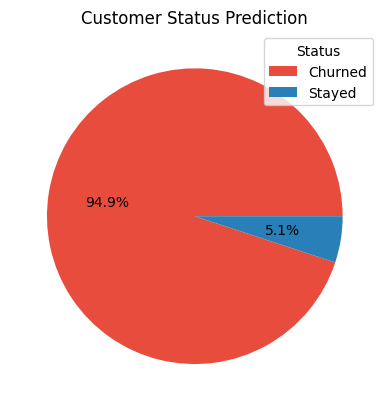

In [84]:
plt.pie(new_df['customer_status_predicted'].value_counts(), autopct='%1.1f%%', colors=['#E74C3C', '#2980B9'])
plt.legend(['Churned', 'Stayed'], title='Status')
plt.title('Customer Status Prediction')
plt.show()